This Jupyter notebook was created by Kaisa Taipale for \the\world Girls' Machine Learning Day Camp. Copyright permissions at the end of the file.

## Set up the data

I'm making three fake data sets here. One has only two groups. Two have three groups, spread out to different degrees.

At the top, I import numpy (good for math functions), sklearn's svm functions (support vector machines), and the plotting library from matplotlib. I also import accuracy_score from the metrics library in scikit-learn.

In [34]:
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
%matplotlib inline
import matplotlib.pyplot as plt
# this line makes all the plots a bit bigger -- play with it if you find the images too small
plt.rcParams['figure.figsize'] = [10, 6]

In [26]:
features_train = np.array([[-7,1],[-8,-1,],[-3,-2],[1,1],[2,1],[3,2],[3,1],[3,0]]) #features
labels_train = np.array([1,1,1,2,2,2,2,2]) #labels

In [27]:
features_3_train = np.array([[-7,1],[-8,-1,],[-3,-2],[1,1],[2,1],[3,2],[3,1],[3,0],[4,-2],[4.2,-3.2,],[3.8,-3.3],[3.9,-4.1],[4.3,-3]]) #features
labels_3_train = np.array([1,1,1,2,2,2,2,2,3,3,3,3,3])

In [28]:
features_3_train_sp = np.array([[-13,-8],[-8,-1,],[-3,-2],[1,2],[2,1],[3,6],[3,7],[3,0],[4,-2],[4.2,-3.2,],[3.8,-3.3],[3.9,-4.1],[4.3,-3]]) #features
labels_3_train_sp = np.array([1,1,1,2,2,2,2,2,3,3,3,3,3])

(-9, 8)

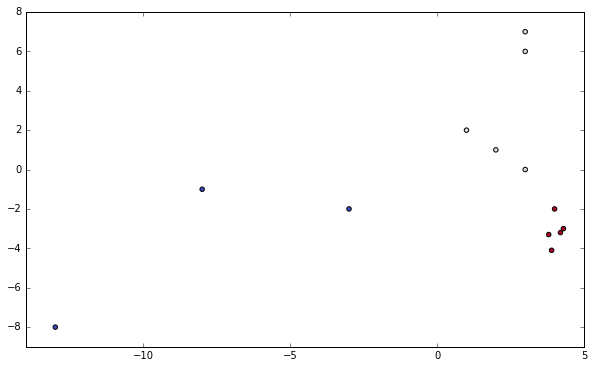

In [31]:
plt.scatter(features_3_train_sp[:,0],features_3_train_sp[:,1],c=labels_3_train_sp,cmap=plt.cm.coolwarm)
plt.xlim(-14,5)
plt.ylim(-9,8)

(-4, 3)

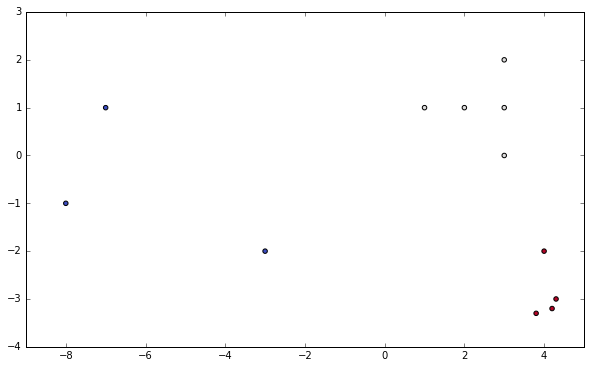

In [32]:
plt.scatter(features_3_train[:,0],features_3_train[:,1],c=labels_3_train,cmap=plt.cm.coolwarm)
plt.xlim(-9,5)
plt.ylim(-4,3)

For later use, we will want this "make_meshgrid" function. It makes a grid of x and y points for the whole area you want to look at, with a small step of h=.02 vertically and horizontally between points. This is code from http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html.

In [7]:
# the computer needs a grid of points to calculate the colors at:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy



In [11]:
# This takes in the graph axes, the model, the grid above, and plots the colors

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



In [8]:
# this splits the data into the x-component and the y-component. For some reason Python wants
# a whole vector of x-components and a whole vector of y-components, and the X[:, i] says
# take all rows and only the first (0th) column for X0 
# and take all rows and only the second (1st) column for X1
# Then I make the grid based on the data, using the make_meshgrid function from above.
X=features_train
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

## Let's look at support vector machines!

Linear ones first!

In [9]:
# I already loaded scikit-learn and imported SVC
# Use the linear kernel -- just use lines to slice & dice this data!
clfsvm = svm.SVC(kernel="linear")
clfsvm = clfsvm.fit(features_train, labels_train)  

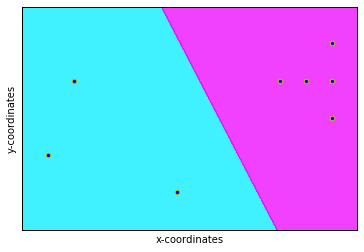

In [12]:
fig, ax = plt.subplots()
# play with the colors here: plt.cm. winter, viridis, inferno, magma, seismic, wistia
# https://matplotlib.org/examples/color/colormaps_reference.html
plot_contours(ax, clfsvm, xx, yy,
                  cmap=plt.cm.cool, alpha=0.8)
ax.scatter(X0, X1,  cmap=plt.cm.binary, s=20, edgecolors='y')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('x-coordinates')
ax.set_ylabel('y-coordinates')
ax.set_xticks(())
ax.set_yticks(())
#ax.set_title(title) # I didn't give a title yet
plt.show()
# yep, that's a line. 

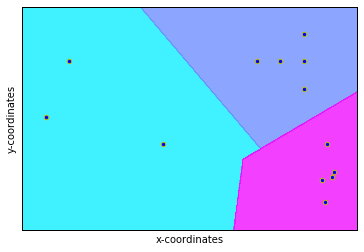

In [23]:
# Let's compare what we get for the three separate groups data example:

X=features_3_train
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
fig, ax = plt.subplots()
# play with the colors here: plt.cm. winter, viridis, inferno, magma, seismic, wistia
# https://matplotlib.org/examples/color/colormaps_reference.html
plot_contours(ax, clfsvm, xx, yy,
                  cmap=plt.cm.cool, alpha=0.8)
ax.scatter(X0, X1,  cmap=plt.cm.PiYG, s=20, edgecolors='y')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('x-coordinates')
ax.set_ylabel('y-coordinates')
ax.set_xticks(())
ax.set_yticks(())
#ax.set_title(title) # I didn't give a title yet
plt.show()


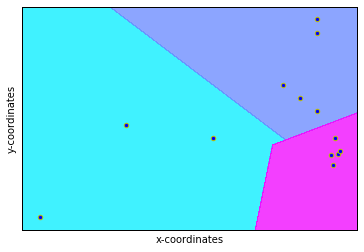

In [24]:
# Let's compare what we get for the three separate groups, spread-out data example:

X=features_3_train_sp
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
fig, ax = plt.subplots()
# play with the colors here: plt.cm. winter, viridis, inferno, magma, seismic, wistia
# https://matplotlib.org/examples/color/colormaps_reference.html
plot_contours(ax, clfsvm, xx, yy,
                  cmap=plt.cm.cool, alpha=0.8)
ax.scatter(X0, X1,  cmap=plt.cm.PiYG, s=20, edgecolors='y')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('x-coordinates')
ax.set_ylabel('y-coordinates')
ax.set_xticks(())
ax.set_yticks(())

plt.show()

# Does it really look much different? 
# Do the far-away points matter?

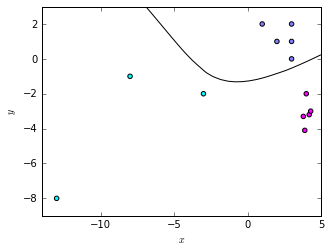

In [13]:
# let's do this for the spread-out example, using SVM with kernel "linear"
xlim=(-14,5)
ylim=(-9,3)

clfsvm = svm.SVC(kernel="linear",probability=True)
clfsvm = clfsvm.fit(features_3_train_sp, labels_3_train_sp)
# Code here adapted from http://www.astroml.org/book_figures/chapter9/fig_simple_naivebayes.html
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 40),
                     np.linspace(ylim[0], ylim[1], 40))
Z = clfsvm.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 3.75))
ax = fig.add_subplot(111)
ax.scatter(features_3_train_sp[:, 0], features_3_train_sp[:, 1], c=labels_3_train_sp, cmap=plt.cm.cool, zorder=3)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()
# Why do we get a curve, not a line? And why only one separating curve? I'm confused.

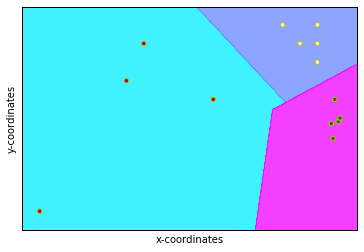

In [69]:
X=features_3_train_sp
# this splits the data into x and y components, and makes the grid based on the data
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

clfsvm = svm.SVC(kernel="linear")
clfsvm = clfsvm.fit(features_3_train_sp, labels_3_train_sp)

fig, ax = plt.subplots()
# play with the colors here: plt.cm. winter, viridis, inferno, magma, seismic, wistia
# https://matplotlib.org/examples/color/colormaps_reference.html
plot_contours(ax, clfsvm, xx, yy,
                  cmap=plt.cm.cool, alpha=0.8)
ax.scatter(X0, X1, c=labels_3_train_sp, cmap=plt.cm.PiYG, s=20, edgecolors='y')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('x-coordinates')
ax.set_ylabel('y-coordinates')
ax.set_xticks(())
ax.set_yticks(())
#ax.set_title(title) # I didn't give a title yet
plt.show()
# Now it's linear!

## Dataset examples!

Let's go through the datasets we played with earlier in the week: the iris data set and the Wisconsin breast cancer tumor data set. One reason we picked these data sets to start with is that they're such classic datasets that they are included in scikit-learn.

You can find a lot more examples of working with the iris data at http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html.


In [4]:
from sklearn import datasets
iris = datasets.load_iris()
# We'll use the same names as the scikit-learn tutorial so that you can use that code if you like
iris_X = iris.data # this is our data
iris_y = iris.target # these are the labels
# This next line shows us what kind of labels we have -- 0, 1, and 2!
np.unique(iris_y)


array([0, 1, 2])

Let's use the techniques from the scikit-learn tutorial to split our data randomly into a training set (you make your model on these data points) and a testing set (you test your model on these data points). One reason to use this method is that you will have your own random training set every time.

In [5]:
# We pick a random seed (a random starting point)
np.random.seed(0)
# then permute the data randomly!
indices = np.random.permutation(len(iris_X))
# Take everything but the last 10 points for training
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
# take those 10 points for testing
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]

In [6]:
# Now we can fit our model on the training set. The output tells us all the parameters we could change.
svc = svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Since we have a training set and a test set, now we can test the accuracy of our model on the test set.

In [7]:
pred = svc.predict(iris_X_test)
accuracy_score(pred,iris_y_test)

0.90000000000000002

What do you think of the accuracy of our predictions?

Frankly, it's hard to visualize this classification, because we have a four-dimensional input set. Let's see what we can do....

One suggestion from the scikit-learn site is [plotting the pairwise decision boundaries](http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html). So we'll look at every single pair of variables (every pair from sepal length, sepal width, petal length, petal width) and plot those. Note that I COPIED THIS CODE from scikit-learn and changed the colors and the classification algorithm used (from decision trees to support vector machines). Copying and modifying code is a great way to learn -- we want you to use this technique where copyright law allows and give credit to the original authors!

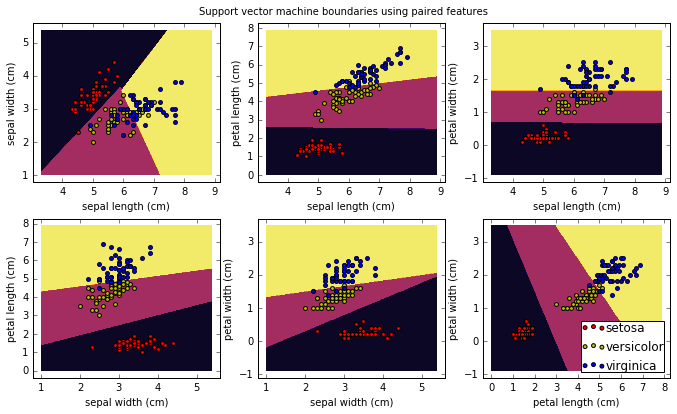

In [33]:
# From scikit learn tutorial at http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = svm.SVC(kernel='linear').fit(X, y)
    #fig=plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.inferno)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.inferno, edgecolor='black', s=15)
               
plt.suptitle("Support vector machine boundaries using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()